In [10]:
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
import gif
import json


def pointManager(lim, n, rand):
    if rand:
        points = [np.random.randint(-lim + 1, lim, 2).tolist() for i in range(n)]
        # save into a json file, with indent
        with open("points.json", "w") as f:
            json.dump(points, f, indent=4)
    else:
        with open("points.json", "r") as f:
            points = json.load(f)
    return points


# f = (2,5)
# a, b = f
lim = 10
n = 10
#points = pointManager(lim, n, rand=1)
points = [[3,6],[10,5],[4,3],[8,9],[9,3.2],[1,8],[4,1]]

f = lambda x, a, b, c: (x ** 2 - 2 * a * x + a ** 2 + b ** 2 - c ** 2) / (2 * b - 2 * c)


class Parabola:
    def __init__(self, p, c, lim):
        self.p = p
        self.a = p[0]
        self.b = p[1]
        self.c = c
        self.lim = lim
        self.x = np.linspace(-self.lim, self.lim, 100)
        self.y = f(self.x, self.a, self.b, self.c)
        self.f = lambda x: (x ** 2 - 2 * self.a * x + self.a ** 2 + self.b ** 2 - self.c ** 2) / (
                2 * self.b - 2 * self.c)

    def plot(self, color='b'):
        plt.plot(self.x, self.y, color, alpha=0.5)


class Beachline:
    def __init__(self):
        self.beachline = [() for i in range(len(np.linspace(-lim, lim, 100)))]
        self.linspace = np.linspace(-lim, lim, 100)

    def detectIntersections(self):
        intersections = []
        vertices = {}
        for i in range(len(self.beachline) - 1):
            pair = [self.beachline[i][1], self.beachline[i + 1][1]]
            if self.beachline[i][1] != self.beachline[i + 1][1]:
                point = (self.linspace[i], (self.beachline[i][0] + self.beachline[i + 1][0]) / 2)
                intersections.append(point)
                # if pair not in vertices.keys() and point[1] < lim:
                #     vertices[pair] = point

        return intersections, vertices


class Voronoi:
    def __init__(self, points, lim):
        self.currBeachLine2 = None
        self.points = points
        self.lim = lim
        self.linspace = np.linspace(-lim, lim, 100)
        self.nonActive = []
        self.currBeachLine = np.inf * np.ones(len(self.linspace))

        self.intersections = []
        self.vorVertex = []
    @gif.frame
    def beachLineP(self, c):
        # print(len(self.intersections))
        self.currBeachLine2 = Beachline()
        plt.grid("on")
        # regular lim axis
        plt.xlim(-lim - 1, lim + 1)
        plt.ylim(-lim, lim)

        # plot bizectriz
        plt.plot(self.linspace, np.ones(len(self.linspace)) * c, 'r')
        active = [p for p in self.points if p[1] > c and p not in self.nonActive]
        plt.plot([i[0] for i in active], [i[1] for i in active], 'or')
        plt.plot([i[0] for i in self.points if i not in active], [i[1] for i in self.points if i not in active], 'ok')
        if len(active) == 0:
            return

        for i in active:

            par = Parabola(i, c, lim)
            isactive = False  # suppose it is not active
            # par.plot('k--')
            for j in range(len(par.y)):
                if par.y[j] < self.currBeachLine[j]:
                    self.currBeachLine[j] = par.y[j]
                    self.currBeachLine2.beachline[j] = (par.y[j], i)

                    isactive = True  # if it has a point in the beach line, it is active
            if not isactive:
                self.nonActive.append(i)



        intersections, vertices = self.currBeachLine2.detectIntersections()
        self.intersections.extend(intersections)
        plt.plot([i[0] for i in self.intersections], [i[1] for i in self.intersections], 'g.')
        # xi = []
        # tmp = self.linspace.tolist()
        # for i in index:
        #     xi.append(tmp[i])
        #
        # plt.plot(xi, intersections, 'go')

        plt.plot(self.linspace, self.currBeachLine, 'b')

    def animate(self):
        frames = []
        for i in np.linspace(-lim, lim, 100):
            # if i*-1 < -5.5:
            #     continue
            frame = self.beachLineP(i * -1)
            frames.append(frame)

        gif.save(frames, "beachLine.gif", duration=100)

vor = Voronoi(points, lim)
print(vor)
vor.animate()



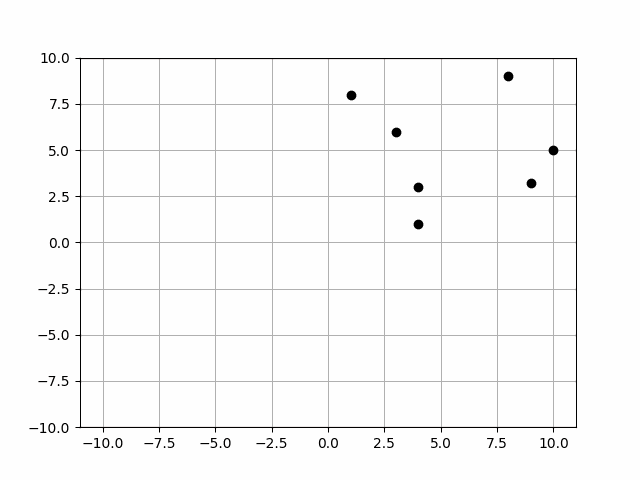

In [7]:
display.Image("beachLine.gif")

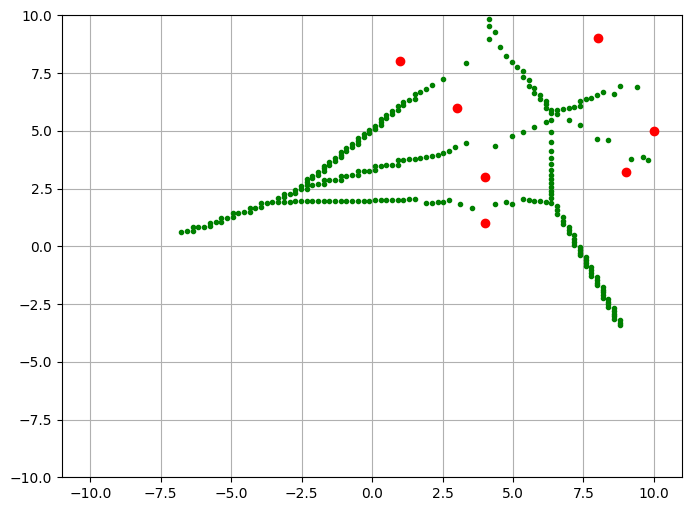

In [8]:


def pointManager(lim, n, rand):
    if rand:
        points = [np.random.randint(-lim + 1, lim, 2).tolist() for i in range(n)]
        # save into a json file, with indent
        with open("points.json", "w") as f:
            json.dump(points, f, indent=4)
    else:
        with open("points.json", "r") as f:
            points = json.load(f)
    return points


class Parabola:
    def __init__(self, p, c, lim):
        self.p = p
        self.a = p[0]
        self.b = p[1]
        self.c = c
        self.lim = lim
        self.x = np.linspace(-self.lim, self.lim, 100)
        self.y = self.f(self.x)

    def f(self, x):
        return (x ** 2 - 2 * self.a * x + self.a ** 2 + self.b ** 2 - self.c ** 2) / (2 * self.b - 2 * self.c)

    def plot(self, color='b'):
        plt.plot(self.x, self.y, color, alpha=0.5)


class Beachline:
    def __init__(self):
        self.beachline = [() for i in range(len(np.linspace(-lim, lim, 100)))]
        self.linspace = np.linspace(-lim, lim, 100)

    def detectIntersections(self):
        intersections = []
        for i in range(len(self.beachline) - 1):
            if self.beachline[i][1] != self.beachline[i + 1][1]:
                point = (self.linspace[i], (self.beachline[i][0] + self.beachline[i + 1][0]) / 2)
                intersections.append(point)
        return intersections


class Voronoi:
    def __init__(self, points, lim):
        self.points = points
        self.lim = lim
        self.linspace = np.linspace(-lim, lim, 100)
        self.nonActive = []
        self.currBeachLine = np.inf * np.ones(len(self.linspace))
        self.intersections = []

    def beachLineP(self, c):
        beachline = Beachline()
        active = [p for p in self.points if p[1] > c and p not in self.nonActive]
        if len(active) == 0:
            return

        for i in active:
            par = Parabola(i, c, lim)
            isactive = False
            for j in range(len(par.y)):
                if par.y[j] < self.currBeachLine[j]:
                    self.currBeachLine[j] = par.y[j]
                    beachline.beachline[j] = (par.y[j], i)
                    isactive = True
            if not isactive:
                self.nonActive.append(i)

        intersections = beachline.detectIntersections()
        self.intersections.extend(intersections)

    def grph(self):
        plt.figure(figsize=(8, 6))
        for i in np.linspace(-lim, lim, 100):
            self.beachLineP(i * -1)
        for p in self.points:
            plt.plot(p[0], p[1], 'ro')
        for inter in self.intersections:
            plt.plot(inter[0], inter[1], 'g.')
        plt.xlim(-lim - 1, lim + 1)
        plt.ylim(-lim, lim)
        plt.grid(True)
        plt.show()


voronoi = Voronoi(points, lim)
voronoi.grph()

4)

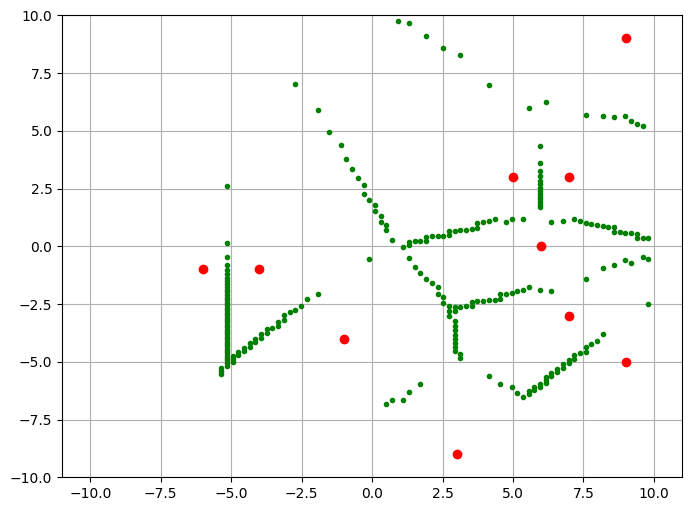

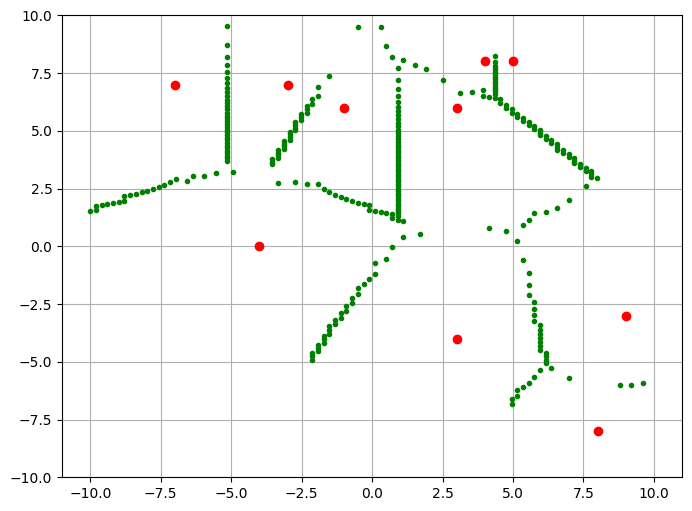

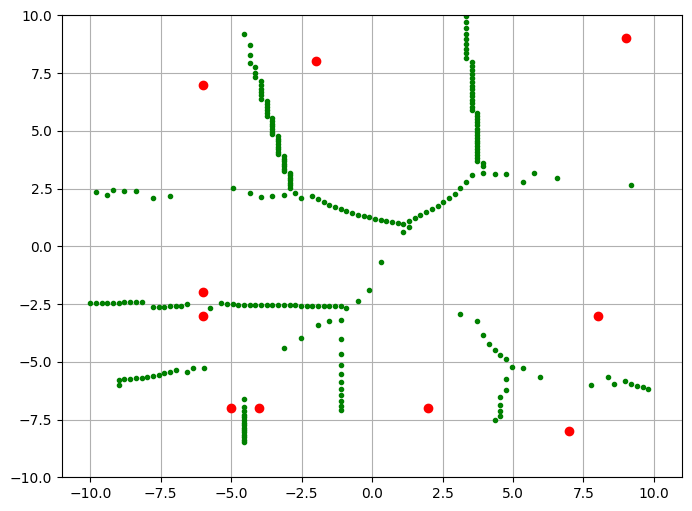

IndexError: tuple index out of range

<Figure size 800x600 with 0 Axes>

In [9]:
lim = 10
n = 10  # Number of points
for x in range(5):
  points = pointManager(lim, n, rand=1)
  voronoi = Voronoi(points, lim)
  voronoi.grph()
